<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Подключаем-библиотеки" data-toc-modified-id="Подключаем-библиотеки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подключаем библиотеки</a></span></li><li><span><a href="#Открываем-датасет" data-toc-modified-id="Открываем-датасет-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Открываем датасет</a></span></li><li><span><a href="#Анализ-признаков" data-toc-modified-id="Анализ-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ признаков</a></span></li><li><span><a href="#обработка-пропусков-и-устранений-некоторых-аномалий" data-toc-modified-id="обработка-пропусков-и-устранений-некоторых-аномалий-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>обработка пропусков и устранений некоторых аномалий</a></span></li><li><span><a href="#мультиколлинеарность" data-toc-modified-id="мультиколлинеарность-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>мультиколлинеарность</a></span></li><li><span><a href="#синтетические-признаки" data-toc-modified-id="синтетические-признаки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>синтетические признаки</a></span></li><li><span><a href="#отбор-финального-набора-обучающих-признаков" data-toc-modified-id="отбор-финального-набора-обучающих-признаков-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>отбор финального набора обучающих признаков</a></span></li><li><span><a href="#Подготовка-к-ML" data-toc-modified-id="Подготовка-к-ML-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Подготовка к ML</a></span></li><li><span><a href="#ML" data-toc-modified-id="ML-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>ML</a></span><ul class="toc-item"><li><span><a href="#dummy_classifier" data-toc-modified-id="dummy_classifier-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>dummy_classifier</a></span></li><li><span><a href="#logistic-regression-classifier" data-toc-modified-id="logistic-regression-classifier-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>logistic regression classifier</a></span></li><li><span><a href="#random-forest-classifier" data-toc-modified-id="random-forest-classifier-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>random forest classifier</a></span></li><li><span><a href="#decision-tree-classifier" data-toc-modified-id="decision-tree-classifier-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>decision tree classifier</a></span></li><li><span><a href="#catboost" data-toc-modified-id="catboost-10.5"><span class="toc-item-num">10.5&nbsp;&nbsp;</span>catboost</a></span></li><li><span><a href="#lgbm-classifier" data-toc-modified-id="lgbm-classifier-10.6"><span class="toc-item-num">10.6&nbsp;&nbsp;</span>lgbm classifier</a></span></li></ul></li><li><span><a href="#submission-to-kaggle" data-toc-modified-id="submission-to-kaggle-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>submission to kaggle</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Введение

<a id='contence'></a>
Проект-мастерская "предсказания музыкальных жанров". 
По таким характеристикам как акустичность, танцевальность, продолжительность, энергичность, инструментальность, базовый ключ (нота) произведения, привлекательность, громкость, модальность (мажорная или минорная) трека, выразительность, темп, дата загрузки в сервис, привлекательность произведения для пользователей сервиса

нужно предсказать музыкальный жанр для произведения.

План следующий:

    -подключение библиотек 
    -открытие данных и ознакомление с данными,
    -предварительная обработка,
    -полноценный разведочный анализ,
    -разработка новых синтетических признаков, (как выяснилось, позже они нам мешают)
    -проверка на мультиколлинеарность,
    -отбор финального набора обучающих признаков,
    -введение пайплайна с параметрами
    -проверка на baseline модели
    -выбор и обучение моделей + анализ важности признаков
    -итоговая оценка качества предсказания лучшей модели
    -подготовка к отправке на каггл
    -Вывод

<a id='step1'></a>
## Подключаем библиотеки
[в начало](#contence)

In [429]:
from IPython.display import display, HTML ## для удобства
display(HTML("<style>.container { width:70% !important; }</style>"))
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import ydata_profiling
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import warnings
from sklearn.linear_model import LogisticRegression
import ydata_profiling
import plotly.express as px
from lightgbm import LGBMClassifier
# from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import std, mean
from sklearn.model_selection import KFold
warnings.filterwarnings("ignore")

In [430]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import catboost as ctb
from catboost import Pool, cv

RANDOM_STATE=1122

<a id='step2'></a>
## Открываем датасет
[в начало](#contence)

In [431]:
df=pd.read_csv('datasets\kaggle_music_genre_train.csv', index_col = 'instance_id') 
df.index=df.index.astype('int') #  по феншую
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20394 entries, 25143 to 86375
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        20394 non-null  object 
 1   acousticness      20394 non-null  float64
 2   danceability      20394 non-null  float64
 3   duration_ms       20394 non-null  float64
 4   energy            20394 non-null  float64
 5   instrumentalness  20394 non-null  float64
 6   key               19659 non-null  object 
 7   liveness          20394 non-null  float64
 8   loudness          20394 non-null  float64
 9   mode              19888 non-null  object 
 10  speechiness       20394 non-null  float64
 11  tempo             19952 non-null  float64
 12  obtained_date     20394 non-null  object 
 13  valence           20394 non-null  float64
 14  music_genre       20394 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.5+ MB




<a id='step3'></a>
## Анализ признаков
[в начало](#contence)

- 13 признаков,
 - из них 8 численных acousticness	danceability	duration_ms	energy	instrumentalness	liveness	loudness	speechiness	tempo	valence
 - и 2 категориальных key, mode
- 1 целевой признак - музыкальный жанр

In [432]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,20394.000000,20394.000000,2.039400e+04,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,19952.000000,20394.000000
mean,0.274783,0.561983,2.203754e+05,0.625276,0.159989,0.198540,-8.552998,0.091352,120.942522,0.464588
std,0.321643,0.171898,1.267283e+05,0.251238,0.306503,0.166742,5.499917,0.097735,30.427590,0.243387
min,0.000000,0.060000,-1.000000e+00,0.001010,0.000000,0.013600,-44.406000,0.022300,34.765000,0.000000
25%,0.015200,0.451000,1.775170e+05,0.470000,0.000000,0.097300,-10.255750,0.035600,95.921750,0.272000
50%,0.120000,0.570000,2.195330e+05,0.666000,0.000144,0.130000,-7.052000,0.049050,120.012500,0.457000
75%,0.470000,0.683000,2.660000e+05,0.830000,0.084475,0.253000,-5.054000,0.095575,141.966250,0.653000
max,0.996000,0.978000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.041000,0.992000


In [433]:
df.sample(5)

,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
instance_id,,,,,,,,,,,,,,,
62932,A So Bi Ma Sho,0.98100,0.520,262293.0,0.182,0.879000,A,0.0939,-17.517,Minor,0.0490,75.388,4-Apr,0.281,Anime
84779,魂のルフラン - LIVE,0.08180,0.514,319640.0,0.784,0.000022,C#,0.8650,-8.097,Major,0.0524,129.924,4-Apr,0.348,Anime
54922,Blue,0.27400,0.589,177307.0,0.382,0.803000,G#,0.0855,-12.095,Major,0.0307,146.528,4-Apr,0.495,Blues
72841,Same Old Song,0.03150,0.471,224719.0,0.714,0.000083,E,0.0926,-5.699,Minor,0.0376,170.103,4-Apr,0.536,Country
90395,Endpoint - Instrumenal,0.00155,0.433,88605.0,0.873,0.909000,F#,0.1700,-6.459,Major,0.0616,86.519,4-Apr,0.141,Anime


**сводка из ydata_profiling** <br>
acousticness is highly overall correlated with energy and 1 other fields	High correlation <br>
energy is highly overall correlated with acousticness and 1 other fields	High correlation <br>
loudness is highly overall correlated with acousticness and 1 other fields	High correlation <br>
obtained_date is highly imbalanced (72.5%)	Imbalance <br>
key has 735 (3.6%) missing values	Missing <br>
mode has 506 (2.5%) missing values	Missing <br>
tempo has 442 (2.2%) missing values	Missing <br>
instance_id has unique values	Unique <br>
instrumentalness has 5978 (29.3%) zeros	Zeros <br>

мои предварительные выводы:
        
    -obtained_date - дата очевидно не влиет на жанр + там всего три варианта значений,  поэтому лучше отбросим как неинформ. признак
    
    -присутствуют пропуски в key, mode, tempo; нужно будет попробовать сгруппировать по жанрам и заполнить.
    key, mode - категориальные признаки, tempo - количественный
    
    -присутствует  заметная корреляция между признаками: acousticness, loudness, tempo; нужно попробовать применить методы борьбы с мультиколлинеарностью для этих признаков. попробуем создание новых синт. признаков.
        

проведем анализ количественных признаков

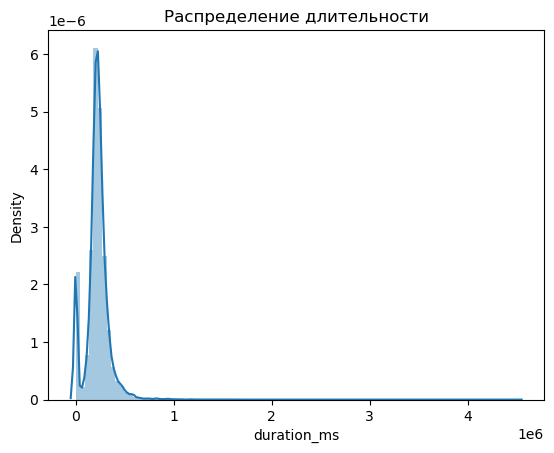

In [434]:
plt.title('Распределение длительности')
sns.distplot(df.duration_ms, bins=100);

виден выброс на 0 , так же присутствуют аномально долгие треки. отбросим нулевые и слишком длинные для обучения. так же это будет в тестовой выборке, поэтому надо обработать одинаково

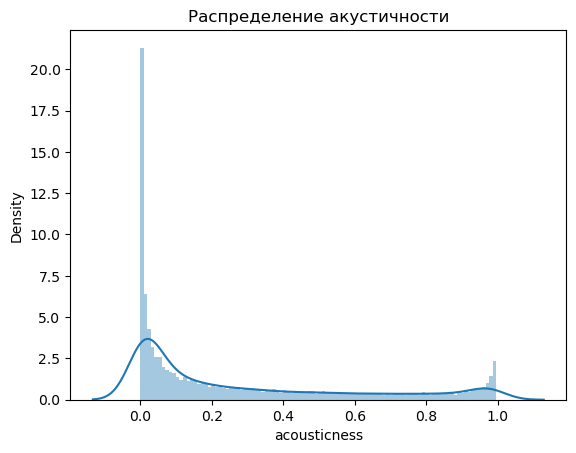

In [435]:
plt.title('Распределение акустичности')
sns.distplot(df['acousticness'], bins=100);

In [436]:
df['acousticness'].describe() # у большинства треков акустичности либо 0 либо близко к 1

count    20394.000000
mean         0.274783
std          0.321643
min          0.000000
25%          0.015200
50%          0.120000
75%          0.470000
max          0.996000
Name: acousticness, dtype: float64

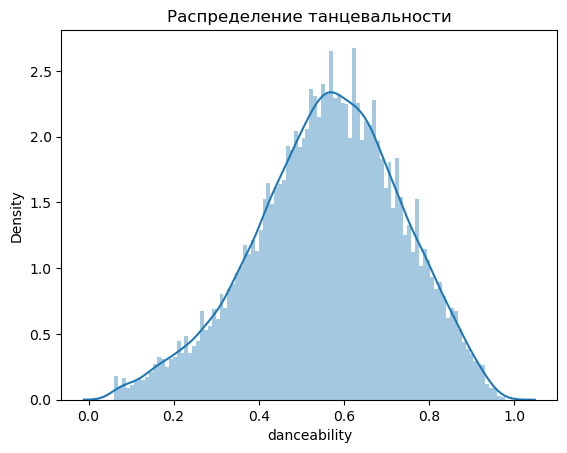

In [437]:
plt.title('Распределение танцевальности')
sns.distplot(df['danceability'], bins=100);

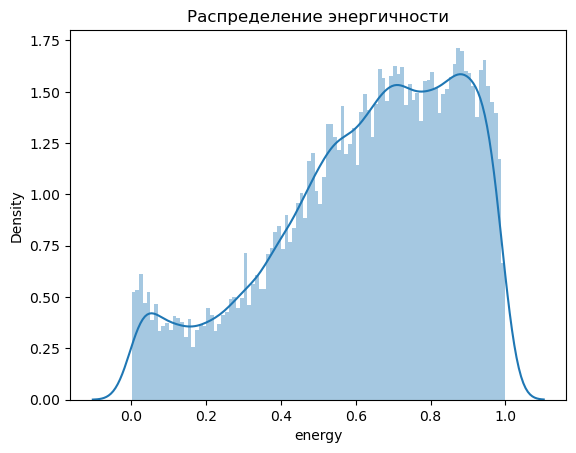

In [438]:
plt.title('Распределение энергичности')
sns.distplot(df['energy'], bins=100);

всё прилично

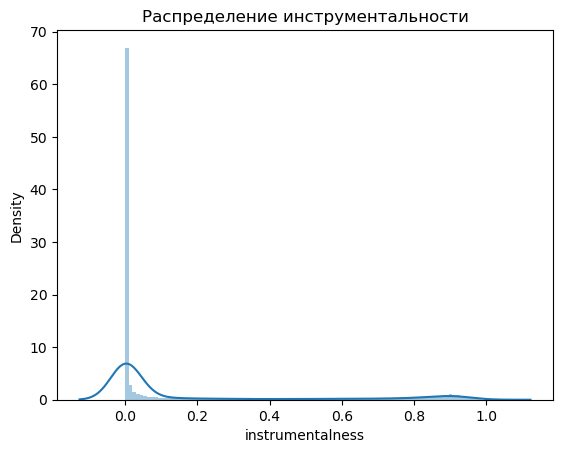

In [439]:
plt.title('Распределение инструментальности')
sns.distplot(df['instrumentalness'], bins=100);

In [440]:
df['instrumentalness'].describe() # странное признак, мне кажется он будет нам мешать

count    20394.000000
mean         0.159989
std          0.306503
min          0.000000
25%          0.000000
50%          0.000144
75%          0.084475
max          0.996000
Name: instrumentalness, dtype: float64

виден выброс около нуля - нужно обработать

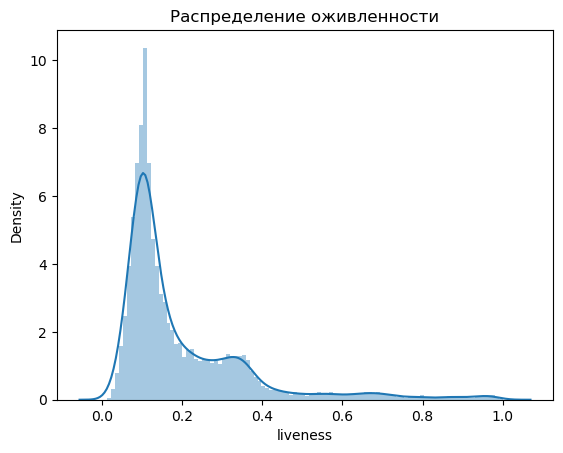

In [441]:
plt.title('Распределение оживленности')
sns.distplot(df['liveness'], bins=100);

выглядит прилично

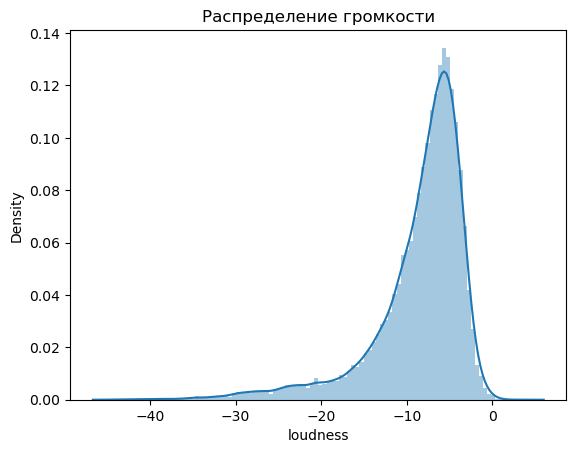

In [442]:
plt.title('Распределение громкости')
sns.distplot(df['loudness'], bins=100);

тоже всё прилично

<AxesSubplot:title={'center':'Распределение темпа'}, xlabel='tempo', ylabel='Density'>

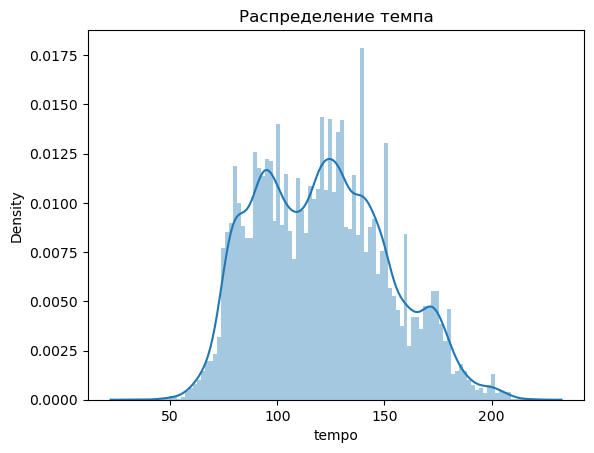

In [443]:
plt.title('Распределение темпа')
sns.distplot(df['tempo'], bins=100)

можно оставить как есть

<AxesSubplot:title={'center':'Распределение привлекательности для пользователей'}, xlabel='valence', ylabel='Density'>

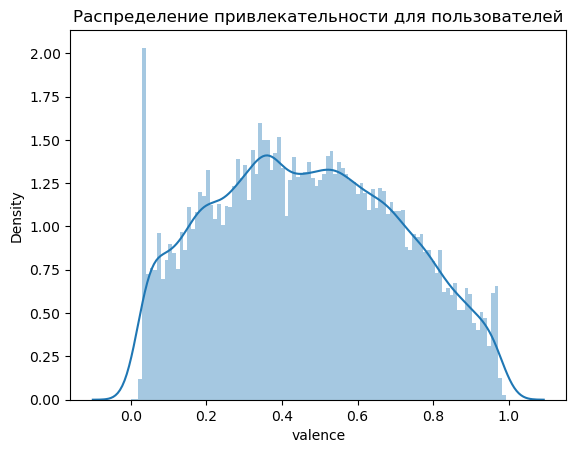

In [444]:
plt.title('Распределение привлекательности для пользователей')
sns.distplot(df['valence'], bins=100)

<AxesSubplot:title={'center':'Распределение темпа'}, xlabel='tempo', ylabel='Density'>

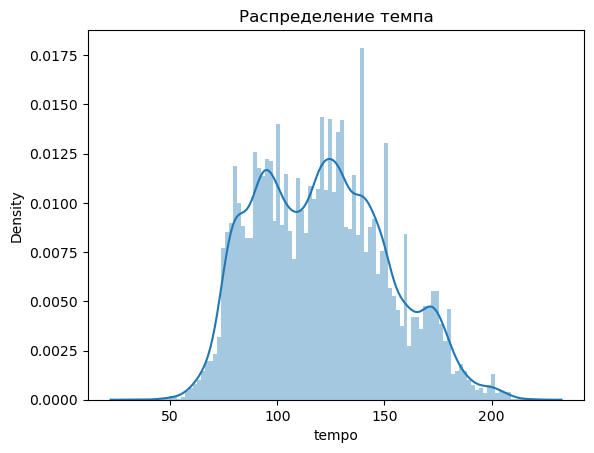

In [445]:
plt.title('Распределение темпа')
sns.distplot(df.tempo, bins=100)

<a id='step3'></a>
## обработка пропусков и устранений некоторых аномалий 
[к содержанию](#contence)

duration_ms

<AxesSubplot:title={'center':'Распределение длительности'}, xlabel='duration_ms', ylabel='Density'>

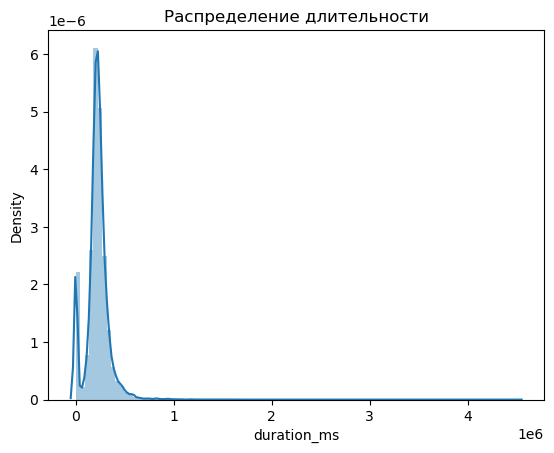

In [446]:
plt.title('Распределение длительности')
sns.distplot(df.duration_ms, bins=100)

видно что есть выбросы 

In [447]:
THRESHOLD_MAX = 1e+6
# THRESHOLD_MIN = 1e+4

df.duration_ms=df.duration_ms.replace(-1, np.nan)
df.duration_ms.isna().sum()

2009

In [448]:
df.duration_ms = df.duration_ms.fillna(
    df.groupby('music_genre')['duration_ms'].transform('median')) # заполним медианным по группа music_genre, но для тестовой выборки такой вариант не пойдет

In [449]:
df.duration_ms.isna().sum()

0

In [450]:
df=df.query('duration_ms<@THRESHOLD_MAX') # отрежем сверхдлинные треки

<AxesSubplot:title={'center':'Распределение длительности после обработки'}, xlabel='duration_ms', ylabel='Density'>

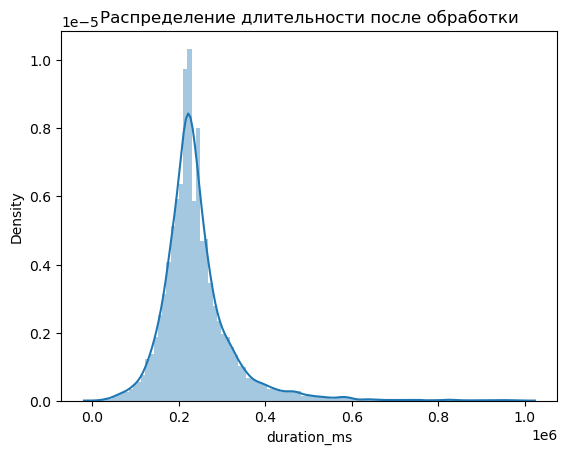

In [451]:
plt.title('Распределение длительности после обработки')
sns.distplot(df.duration_ms, bins=100)

вот что получилось после обработки duration

tempo
- tempo has 442 (2.2%) missing values	Missing <br>
заполним -1, всего 2%

mode 

заполним как missing

дубликаты

In [452]:
print( df.duplicated().sum()) 
df=df.drop_duplicates()

1


In [453]:
def preprocess_data(df): # сюда добавим заполнение длительности и tempo по df+test
        
    df = df.rename(columns={'duration_ms': 'duration'})
    
    df.duration = round(df.duration/1000,2) #переведем в секунды
    
    df.tempo = df.tempo.fillna(-1)
    
    df[['key','mode']]=df[['key','mode']].fillna('missing')

    return df  

In [454]:
df= preprocess_data(df)

In [455]:
df.isna().sum()

track_name          0
acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

## мультиколлинеарность
[в начало](#contence)

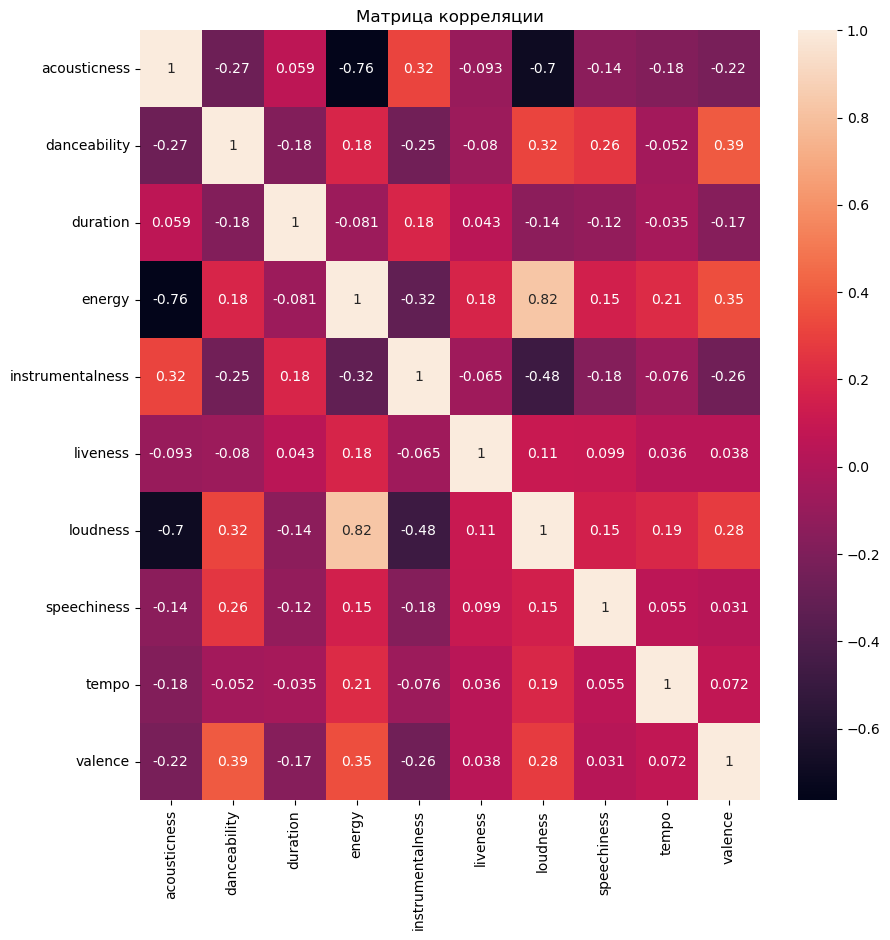

In [456]:
plt.figure(figsize=(10,10))
plt.title('Матрица корреляции')

sns.heatmap(df.corr(), annot=True)
plt.show()

Вот несколько методов борьбы с мультиколлинеарностью в задачах машинного обучения:

1. *Исключение признаков:* Удаление одного из мультиколлинеарных признаков может помочь устранить проблему. Однако это требует осторожности, чтобы не потерять важную информацию.

2. *Регуляризация:* Использование методов регуляризации, таких как L1 (Lasso) или L2 (Ridge), может помочь снизить влияние мультиколлинеарности, штрафуя большие значения коэффициентов.

3. *Сокращение размерности:* Методы, такие как PCA (Principal Component Analysis) или факторный анализ, позволяют снизить размерность признакового пространства, что может уменьшить влияние мультиколлинеарности.

4. *Объединение признаков:* Создание новых признаков, объединяя мультиколлинеарные признаки, может помочь уменьшить их взаимосвязь.

5. *Информационные критерии:* Использование информационных критериев, таких как AIC (Akaike Information Criterion) или BIC (Bayesian Information Criterion), может помочь выбрать наилучший набор признаков.

6. *Кросс-валидация:* При использовании моделей машинного обучения, таких как регрессия, проведение кросс-валидации может помочь оценить влияние мультиколлинеарности на производительность модели.

Выбор конкретного метода зависит от контекста задачи и данных. Часто используется комбинация нескольких методов для борьбы с мультиколлинеарностью.

- Исключать признаки нужно если это будет давать прирост модели, в ходе экспериментов. Пока я ничего такого не заметил
- Некоторые мультиколлинеарные признаки объединены
- Будем использовать кросс-валидацию

## синтетические признаки
[в начало](#contence)

наэксперемнтировался тут, но большо прироста не заметил

In [457]:
def add_new_features(df):
    try:
#         df['acousticness^2+energy^2']=pow(df['acousticness'],2)+pow(df['energy'],2)
#        df['sqr_instrumentalness_plus_sqr_acousticness']=pow(df['instrumentalness'],2)+pow(df['acousticness'],2)
#         df['1_to_duration_plus_1_to_danceability']=(1/df['duration'])*df['danceability']
#         df['sqr_acousticness_plus_sqr_energy'] = pow(df['acousticness'],2)+pow(df['energy'],2)
#         df['danceability_valence_instrumentalness_speechiness']=df['speechiness']+df['instrumentalness']+df['danceability']+df['valence']
#         df['tempo*energy']=df.acousticness*df.energy
#         df['loudness*energy']=df.loudness*df.energy
        print('success')
    except:
        print('nothing added')
        
        
add_new_features(df)

# acousticness is highly overall correlated with energy and 1 other fields	High correlation <br>
# energy is highly overall correlated with acousticness and 1 other fields	High correlation <br>
# loudness is highly overall correlated with acousticness and 1 other fields

success


## отбор финального набора обучающих признаков
[в начало](#contence)

In [458]:
drop_list=[
#           'loudness', 
#            'energy', #так как ввели объединенный признак
           'track_name',
           'obtained_date',
#            'key',
#            'mode'
            
          ]

In [459]:
def drop_features(df,drop_list):
    try:
        df=df.drop(drop_list,axis=1)
        print('\n dropped features',drop_list)
    except:
        print ('nothing to drop')
    return df

In [460]:
df=drop_features(df,drop_list)


 dropped features ['track_name', 'obtained_date']


## Подготовка к ML
[в начало](#contence)

выделим численные и категориальные признаки

In [461]:
target = 'music_genre'
print(f'целевой признак: {target}')
cat_col=df.drop(target,axis =1).select_dtypes(include=['object']).columns.tolist()
print(f'категориальные признаки:{cat_col}')
num_col=df._get_numeric_data().columns.tolist()
print(f'численные признаки:{num_col}')
features_col=cat_col+num_col;
print(f'все признаки:{features_col}')

целевой признак: music_genre
категориальные признаки:['key', 'mode']
численные признаки:['acousticness', 'danceability', 'duration', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
все признаки:['key', 'mode', 'acousticness', 'danceability', 'duration', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


In [462]:
df[target].value_counts() # классы несбалансированные

Blues          2853
Alternative    2601
Electronic     2557
Rap            2428
Rock           2165
Country        2120
Anime          1900
Classical      1357
Jazz           1237
Hip-Hop        1145
Name: music_genre, dtype: int64

In [463]:
# будем использовать в большинстве моделей кросс-валидацию, а для оценки катбуста  пригодится df_val
df_train,df_val= train_test_split(df,train_size=0.7,random_state = RANDOM_STATE, shuffle=True, stratify=df[target])

print('Размеры выборок: Обучающая -',round(df_train.shape[0]/df.shape[0],2),', валидационная -', 
      round(df_val.shape[0]/df.shape[0],2))

Размеры выборок: Обучающая - 0.7 , валидационная - 0.3


## ML

введем трансформер с энкодером и скейлером

In [464]:
scorer='accuracy' # наша метрика
## введем трансформер
col_transformer = make_column_transformer(
    (OrdinalEncoder(), cat_col),
    (StandardScaler(), num_col),
     remainder='passthrough',
    verbose_feature_names_out=False
)

In [465]:
#посмотрим что получается
pd.DataFrame(
col_transformer.fit_transform(df[features_col]),
).sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11
8768,0.0,0.0,0.960634,-0.089719,-0.344198,1.152785,-0.518163,-0.573032,0.695923,-0.338566,1.361849,1.846031
7486,2.0,0.0,-0.573661,1.011662,-0.180033,0.622861,-0.520559,0.075380,0.431850,-0.394809,0.076014,1.784354
1572,0.0,0.0,1.094457,0.009347,1.174535,-0.476830,-0.520551,-0.567028,-0.296669,-0.564560,-1.012652,-1.320044
8244,12.0,1.0,2.109021,-0.363608,-0.687645,-1.548630,-0.215618,0.657750,-0.675397,-0.504226,0.883983,1.443076
19744,5.0,0.0,-0.839097,0.475540,-0.019852,1.288254,-0.520559,0.981956,0.768174,-0.490933,0.334469,1.743236
19795,1.0,0.0,0.742782,1.530302,-0.849115,-0.688003,-0.520559,-0.579036,0.068046,-0.473549,-0.267372,0.612495
9921,0.0,0.0,1.433682,0.178342,-0.770138,-0.847378,-0.513074,0.837865,0.120824,-0.622848,-0.066825,-0.452458
15784,4.0,0.0,-0.850905,-0.392745,-0.224678,1.280285,-0.520532,-0.692508,1.005129,-0.130979,0.960669,0.119081
12529,8.0,1.0,-0.315352,0.428921,0.413235,-0.950972,1.512378,-1.016714,-0.077003,-0.599328,-1.210880,0.583713
8582,3.0,1.0,-0.800227,1.367135,-1.108194,-0.369252,-0.520062,-0.573032,-0.217684,-0.513430,0.363666,-0.559364


### dummy_classifier
проверка на адекватность

In [466]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

In [467]:
dummy_classifier = DummyClassifier (strategy = "stratified", random_state= RANDOM_STATE) 

In [468]:
dummy_classifier.fit(df_train[features_col],df_train[target])

DummyClassifier(random_state=1122, strategy='stratified')

In [469]:
scores = cross_val_score(dummy_classifier,df_val[features_col],df_val[target], scoring = scorer)
print (f'dummy_classifier accuracy score: {scores.mean() }') 

dummy_classifier accuracy score: 0.11049473815431261


### logistic regression classifier

начнем с простого

In [470]:
#сетка параметров
param_grid_logreg = {'logisticregression__C':[0.001,0.01], 
                     'logisticregression__penalty':('l1', 'l2', 'elasticnet'),
                     'logisticregression__solver':('lbfgs','liblinear','newton-cg'),
                     'logisticregression__max_iter': np.linspace(100, len(df[features_col]), 5),
                     'logisticregression__fit_intercept': [True, False],}

In [471]:
logreg = LogisticRegression(random_state = RANDOM_STATE)
pipe = make_pipeline(col_transformer, logreg)

In [472]:

pipe_cv=RandomizedSearchCV(pipe,
                    param_grid_logreg,
                    n_iter=10,
                    scoring=scorer,
                    cv=10,
                    n_jobs=-1, 
                    random_state=RANDOM_STATE)

In [473]:
%%time
pipe_cv.fit(df[features_col],df[target])

Wall time: 11 s


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinalencoder',
                                                                               OrdinalEncoder(),
                                                                               ['key',
                                                                                'mode']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['acousticness',
                                                                                'danceability',
                                                             

In [474]:
pipe_cv.best_params_

{'logisticregression__solver': 'lbfgs',
 'logisticregression__penalty': 'l2',
 'logisticregression__max_iter': 15297.25,
 'logisticregression__fit_intercept': True,
 'logisticregression__C': 0.01}

In [475]:
pipe_cv.best_score_

0.4011204070472294

### random forest classifier

In [476]:
param_grid_rfclf = ( {'randomforestclassifier__max_depth':range(2, 10,1),
                     'randomforestclassifier__n_estimators':range(100, 300, 20),
                     'randomforestclassifier__criterion':['gini', 'entropy']}) 

In [477]:
rf_clf=RandomForestClassifier(random_state=RANDOM_STATE)

In [478]:
pipe = make_pipeline(col_transformer, rf_clf)

In [479]:
rf_pipe_cv=RandomizedSearchCV(pipe,
                    param_grid_rfclf,
                    n_iter=10,
                    scoring=scorer,
                    cv=KFold(n_splits=5,shuffle=True, random_state=RANDOM_STATE),
                    n_jobs=-1, 
                    random_state=RANDOM_STATE)

In [480]:
%%time 
rf_pipe_cv.fit(df[features_col],df[target])

Wall time: 43.9 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1122, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinalencoder',
                                                                               OrdinalEncoder(),
                                                                               ['key',
                                                                                'mode']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['acousticness',
                                                                                'danceability',
             

In [481]:
rf_pipe_cv.best_params_

{'randomforestclassifier__n_estimators': 280,
 'randomforestclassifier__max_depth': 9,
 'randomforestclassifier__criterion': 'entropy'}

In [482]:
rf_pipe_cv.best_score_

0.47159028476859205

In [483]:
importances_forest = rf_pipe_cv.best_estimator_.named_steps[
    'randomforestclassifier'].feature_importances_

In [484]:
feature_imp= pd.DataFrame({'col': df[features_col].columns,'imp':rf_pipe_cv.best_estimator_.named_steps[
    'randomforestclassifier'].feature_importances_}).sort_values(by='imp',ascending=False)
px.bar(feature_imp,x = 'col', y ='imp',width=800, height=400)

выделил бы что для случайного дерева важныы инструментальность, speechiness, акустичность, танцевальность и громкость

### decision tree classifier

In [485]:
dt_clf=DecisionTreeClassifier(random_state=RANDOM_STATE)

In [486]:
param_grid_dtclf = [{'decisiontreeclassifier__criterion': ['entropy', 'gini'], 'decisiontreeclassifier__max_depth': [i for i in range(1, 11,2)],
              'decisiontreeclassifier__min_samples_leaf': [i for i in range(2, 10,2)], 
               'decisiontreeclassifier__max_leaf_nodes': [i for i in range(2, 10,2)]}]

In [487]:
pipe = make_pipeline(col_transformer, dt_clf)

In [488]:
pipe_cv=RandomizedSearchCV(pipe,
                    param_grid_dtclf,
                    n_iter=10,
                    scoring=scorer,
                    cv=KFold(n_splits=5,shuffle=True, random_state=RANDOM_STATE),
                    n_jobs=-1, 
                    random_state=RANDOM_STATE)

In [489]:
%%time 
pipe_cv.fit(df[features_col],df[target])

Wall time: 1.05 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1122, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinalencoder',
                                                                               OrdinalEncoder(),
                                                                               ['key',
                                                                                'mode']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['acousticness',
                                                                                'danceability',
             

In [490]:
pipe_cv.best_params_

{'decisiontreeclassifier__min_samples_leaf': 2,
 'decisiontreeclassifier__max_leaf_nodes': 8,
 'decisiontreeclassifier__max_depth': 7,
 'decisiontreeclassifier__criterion': 'entropy'}

In [491]:
pipe_cv.best_score_

0.3412059843996379

In [492]:
importances_tree = pipe_cv.best_estimator_.named_steps[
    'decisiontreeclassifier'].feature_importances_

In [493]:
feature_imp= pd.DataFrame({'col': df[features_col].columns,'imp':pipe_cv.best_estimator_.named_steps[
    'decisiontreeclassifier'].feature_importances_}).sort_values(by='imp',ascending=False)
px.bar(feature_imp,x = 'col', y ='imp',width=800, height=400)

плохо угадывает, поэтому идём дальше

### catboost

введем пулы

In [494]:
train_pool= ctb.Pool(df_train[features_col],df_train[target], cat_features=cat_col)
val_pool= ctb.Pool(df_val[features_col],df_val[target], cat_features=cat_col)

In [495]:
ctb_model = ctb.CatBoostClassifier(eval_metric='Accuracy' , #class_weights=class_weights,
                               random_state=RANDOM_STATE, logging_level='Silent',custom_loss='Accuracy',
                                   iterations=20000,learning_rate=0.03,early_stopping_rounds=1000)


In [496]:
ctb_model.fit(train_pool, plot=True, eval_set=val_pool)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

довольно долго обучается, но что поделать. зато интересно смотреть на визуализацию

In [497]:
ctb_model.get_best_score()

{'learn': {'Accuracy': 0.7803423600392873, 'MultiClass': 0.7809088956088048},
 'validation': {'Accuracy': 0.5247994761826813,
  'MultiClass': 1.3218025541732052}}

In [498]:
feature_imp= pd.DataFrame({'col': df[features_col].columns,'imp': ctb_model.get_feature_importance()}).sort_values(by='imp',ascending=False)
px.bar(feature_imp,title='cb classifier feature importances',x = 'col', y ='imp', width=800, height=400)

- вывел feature importances
- по моему мнению набирает лучший accuracy (иногда доходило до 0.54, на каггле конечно же меньше такое набирало-:) ). возьмём её для каггла

### lgbm classifier

In [499]:
param_grid_lgbm_clf = ( {'lgbmclassifier__max_depth':range(4, 9,1),
                     'lgbmclassifier__n_estimators':range(200, 500, 100),
                     'lgbmclassifier__learning_rate':(0.001,0.01),
                     'lgbmclassifier__num_leaves':(12,24,36),
                     'lgbmclassifier__reg_alpha': (0,0.1,0.5),
                        }) 

In [500]:
model=LGBMClassifier(random_state=RANDOM_STATE)

In [501]:
pipe = make_pipeline(col_transformer, model)

In [502]:
pipe_cv=RandomizedSearchCV(pipe,
                    param_grid_lgbm_clf,
                    n_iter=5,
                    scoring=scorer,
                    cv=3,
                    n_jobs=-1, 
                    random_state=RANDOM_STATE)

In [503]:
%%time 
pipe_cv.fit(df[features_col],df[target])

Wall time: 15.6 s


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinalencoder',
                                                                               OrdinalEncoder(),
                                                                               ['key',
                                                                                'mode']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['acousticness',
                                                                                'danceability',
                                                              

In [504]:
pipe_cv.best_params_

{'lgbmclassifier__reg_alpha': 0.1,
 'lgbmclassifier__num_leaves': 36,
 'lgbmclassifier__n_estimators': 200,
 'lgbmclassifier__max_depth': 7,
 'lgbmclassifier__learning_rate': 0.01}

In [505]:
pipe_cv.best_score_

0.49958270888714446

In [506]:
importances_forest = pipe_cv.best_estimator_.named_steps[
    'lgbmclassifier'].feature_importances_

In [507]:
feature_imp= pd.DataFrame({'col': df[features_col].columns,'imp':pipe_cv.best_estimator_.named_steps[
    'lgbmclassifier'].feature_importances_}).sort_values(by='imp',ascending=False)
px.bar(feature_imp,x = 'col', y ='imp',width=800, height=400)

- вывел также важность признаков для модели
- по моим экспериментам угадывает хуже катбуста, но я должен был попробовать))

## submission to kaggle
[в начало](#contence)

processing test dataset

In [508]:
test=pd.read_csv('datasets\kaggle_music_genre_test.csv', index_col = 'instance_id')
print(f'size after opening {test.shape[0]}')

test=preprocess_data(test)

print(f'size after preprocessing {test.shape[0]}')

size after opening 5099
size after preprocessing 5099


In [509]:
test.isna().sum()

track_name          0
acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
dtype: int64

посмотрим на duration в тестовом датасете

<AxesSubplot:>

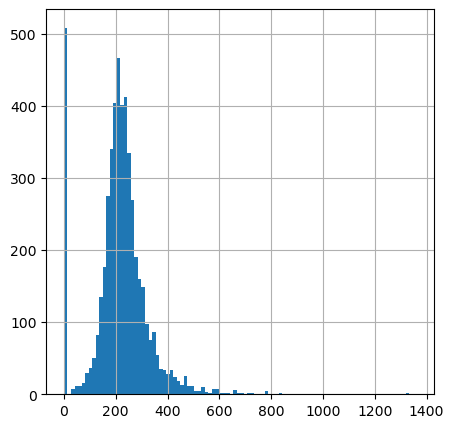

In [510]:
test.duration.hist(bins=100, figsize=(5,5))

In [511]:
test.duration=test.duration.replace(-0.00, np.nan)

test.duration = test.duration.fillna(test.duration.median())

test.duration.isna().sum()

0

заменил на nan, заполнил средним

In [512]:
test[['key','mode']]=test[['key','mode']].fillna('missing')
test.tempo = test.tempo.fillna(-1)

### as median

### 

test.isna().sum()

track_name          0
acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
dtype: int64

<AxesSubplot:>

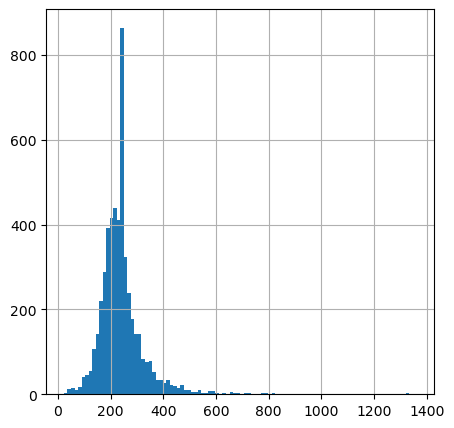

In [513]:
test.duration.hist(bins=100, figsize=(5,5))

In [514]:
add_new_features(test)
test=drop_features(test,drop_list)

success

 dropped features ['track_name', 'obtained_date']


getting prediction

In [515]:
prediction=pd.DataFrame(data=ctb_model.predict(test[features_col])) # для катбуста

In [516]:
# prediction=pd.DataFrame(pipe_cv.best_estimator_.predict(test[features_col])) # для LGBM

In [517]:
prediction['instance_id']=test.index
prediction=prediction[['instance_id',0]]
prediction.columns=['instance_id','music_genre']
prediction
prediction.to_csv('prediction.csv',index=False)

In [518]:
px.bar(prediction['music_genre']) # 0.47 на каггле, больше всего блюза, ну да ладно

In [519]:
px.bar(df_val['music_genre'])

In [520]:
prediction

,instance_id,music_genre
0,48564,Rap
1,72394,Rock
2,88081,Rap
3,78331,Country
4,72636,Alternative
...,...,...
5094,50532,Country
5095,26255,Rap
5096,67924,Rap
5097,79778,Electronic


## Вывод
[в начало](#contence)

В ходе проведенной работы получилось разобраться с пайпланами.

в ходе предобработки данных понял что заполнить duration в тестовой выборке так же не получится, отсюда и хуже метрика на тесте.

Так же пробовал создавать множество синтетических признаков, отбрасывать ненужные, так же не заметил значимого прироста

для коррелирующих признаков ввел объединенный, а их исключил, но заметного прироста в метрике не так же не заметил

научился работать с пайпланами(трансформерами, скейлерами). очень удобно.

задача с несбалансированными классами, пытался делать resample через SMOTE, но так же не заметил ощутимого прироста. так пробовал указывать баланс для классов в моделях, но сильного влияния не заметил